In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_validate,KFold
from sklearn.preprocessing import PolynomialFeatures

In [21]:
Auto = pd.read_csv('Auto.csv')

In [22]:
Auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB


In [23]:
print(len(Auto))
Auto.head()

392


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [24]:
Auto_train,Auto_valid = train_test_split(Auto,test_size=int(len(Auto)/3))

In [25]:
x=PolynomialFeatures(degree=3, include_bias=False).fit_transform(Auto_train['horsepower'].values.reshape(-1,1))

[0.6253080566350959, 0.7273169421265551, 0.7272939675437944, 0.7253235230141449, 0.7110554572476948, 0.6840262625971874, 0.6972987671103688, 0.7168424922065642, 0.7277438572664401, 0.729087873877412]
[27.212677719219048, 19.804098552966796, 19.805767123448415, 19.948874208878134, 20.98511820145552, 22.94816217947342, 21.984222617281283, 20.564824357207588, 19.773093071474943, 19.6754814426921]


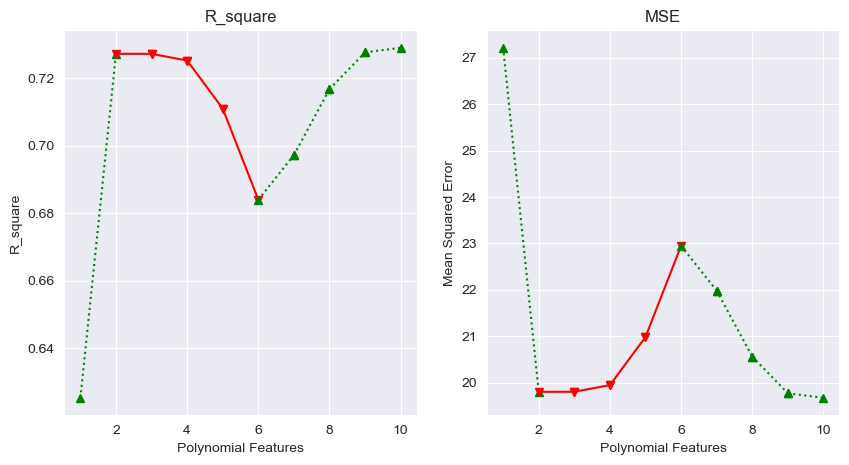

In [97]:
degree=10
y_train=Auto_train['mpg']
y_valid=Auto_valid['mpg']
x_valid=Auto_valid['horsepower'].values.reshape(-1,1)
x_train=Auto_train['horsepower'].values.reshape(-1,1)
r_square=[]
mse=[]
for i in range(1,degree+1):
    x_train_poly=PolynomialFeatures(degree=i, include_bias=False).fit_transform(x_train)
    x_valid_poly=PolynomialFeatures(degree=i, include_bias=False).fit_transform(x_valid)
    reg=LinearRegression().fit(x_train_poly,y_train)
    r_square.append(reg.score(x_valid_poly,y_valid))
    mse.append(np.mean((y_valid-reg.predict(x_valid_poly))**2))
fig, ax = plt.subplots(1,2,figsize=(10,5))
for i in range(1,len(r_square)+1):
    if i<len(r_square):
        if r_square[i-1]>r_square[i]:
            ax[0].plot([i,i+1],[r_square[i-1],r_square[i]],color='red',marker="v")
        elif r_square[i-1]<r_square[i]:
            ax[0].plot([i,i+1],[r_square[i-1],r_square[i]],color='green',marker="^",linestyle=":")
        elif r_square[i-1] == r_square[i]:
            ax[0].plot([i,i+1],[r_square[i-1],r_square[i]],color='blue',marker="o",linestyle="dashdot")
for i in range(1,len(mse)+1):
    if i<len(mse):
        if mse[i-1]>mse[i]:
            ax[1].plot([i,i+1],[mse[i-1],mse[i]],color='green',marker="^",linestyle=":")
        elif mse[i-1]<mse[i]:
            ax[1].plot([i,i+1],[mse[i-1],mse[i]],color='red',marker="v")
        elif mse[i-1] == mse[i]:
            ax[1].plot([i,i+1],[mse[i-1],mse[i]],color='blue',marker="o",linestyle="dashdot")
ax[0].set_title('R_square')
ax[1].set_title('MSE')
ax[0].set_xlabel('Polynomial Features')
ax[1].set_xlabel('Polynomial Features')
ax[1].set_ylabel('Mean Squared Error')
ax[0].set_ylabel('R_square')
print(r_square)
print(mse)

[-51.32035749232733, -35.44257734186744, -34.60606509199104, -36.064321731907356, -35.44368217958547, -33.603107056966834, -35.528112934881975, -36.06508227971836, -34.87707738592339, -34.085546344030085]


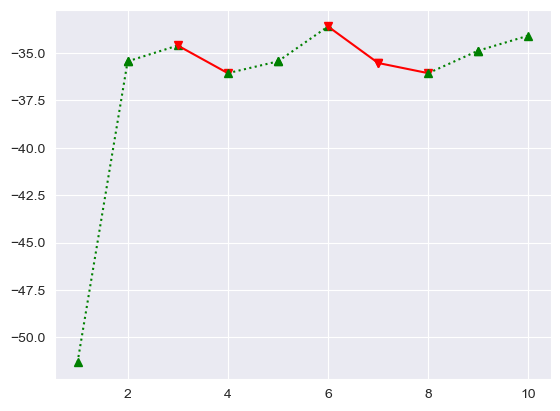

In [134]:
degree=10
x=Auto['horsepower'].values.reshape(-1,1)
y=Auto["mpg"]
CV=[]
for i in range(1,degree+1):
    x_poly=PolynomialFeatures(degree=i, include_bias=False).fit_transform(x)
    cv=(cross_validate(LinearRegression(),x_poly,y,cv=int(len(Auto)*0.5)))
    CV.append(np.mean(cv["test_score"]))
for i in range(len(CV)):
    if i<len(CV)-1:
        if CV[i]<CV[i+1]:
            plt.plot([i+1,i+2],[CV[i],CV[i+1]],color='green',marker="^",linestyle=":")
        elif CV[i]>CV[i+1]:
            plt.plot([i+1,i+2],[CV[i],CV[i+1]],color='red',marker="v")
        elif mse[i] == mse[i+1]:
            plt.plot([i+1,i+2],[CV[i],CV[i+1]],color='blue',marker="o",linestyle="dashdot")
print(CV)